<a href="https://colab.research.google.com/github/MirSh4/imdbSentimentAnalysis/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np


In [2]:

# Load IMDb dataset
num_words = 10000  # Use top 10,000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform input size
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 32, input_length=maxlen),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:

# Train model
history = model.fit(x_train, y_train, epochs=8, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 118s 301ms/step - accuracy: 0.9203 - loss: 0.2095 - val_accuracy: 0.8516 - val_loss: 0.3779
Epoch 2/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 294ms/step - accuracy: 0.9290 - loss: 0.1860 - val_accuracy: 0.8458 - val_loss: 0.3811
Epoch 3/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 296ms/step - accuracy: 0.9370 - loss: 0.1648 - val_accuracy: 0.8404 - val_loss: 0.4468
Epoch 4/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 294ms/step - accuracy: 0.9455 - loss: 0.1534 - val_accuracy: 0.8530 - val_loss: 0.4888
Epoch 5/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 297ms/step - accuracy: 0.9460 - loss: 0.1478 - val_accuracy: 0.8380 - val_loss: 0.4099
Epoch 6/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 295ms/step - accuracy: 0.9529 - loss: 0.1329 - val_accuracy: 0.8475 - val_loss: 0.4353
Epoch 7/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 295ms/step - accuracy: 0.9551 - loss: 0.1263 - val_accuracy: 0.8419 - val_loss: 0.4555
Epoch 8/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 294ms/step - accuracy: 0.9628 - loss: 0

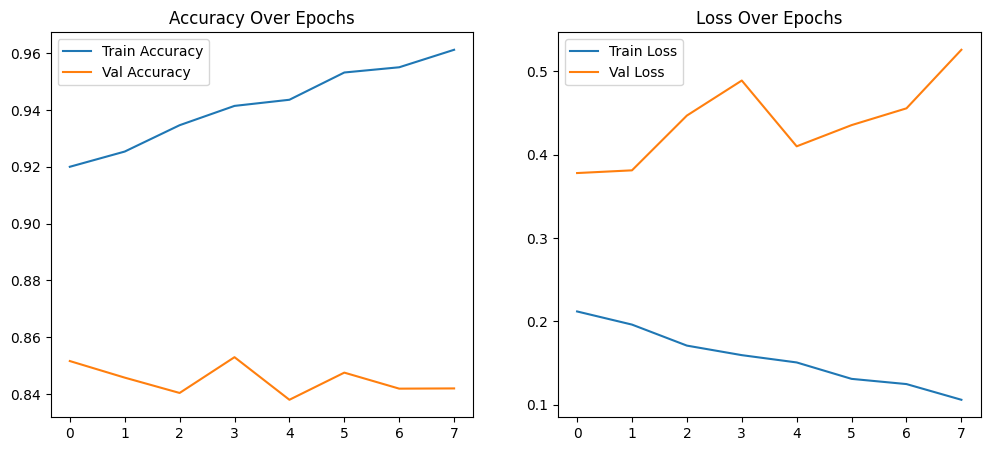

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step


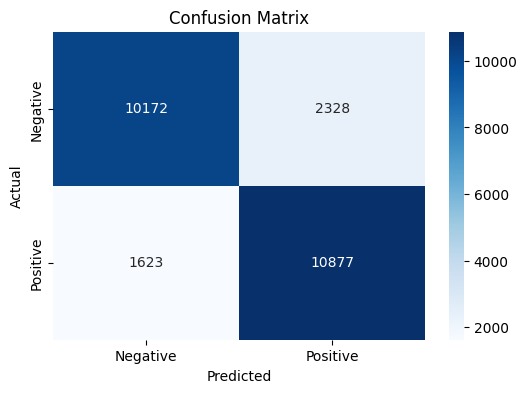

              precision    recall  f1-score   support

    Negative       0.86      0.81      0.84     12500
    Positive       0.82      0.87      0.85     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [7]:
# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# Evaluate model
y_pred = (model.predict(x_test) > 0.5).astype('int32')
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
